In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import pandas as pd

red = pd.read_csv('winequality/winequality-red.csv', sep = None)
white = pd.read_csv('winequality/winequality-white.csv', sep = None)
print ("red wine",red.shape)
print ("white wine",white.shape)

red wine (1599, 12)
white wine (4898, 12)


D:\anaconda\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [4]:

white.drop(['free sulfur dioxide','pH','residual sugar'],axis=1)
X = white.iloc[:,:-1].values
print(len(X))


y = white.iloc[:,-1].values
print(len(y))


from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mltools as ml
from sklearn.utils import shuffle
sc = StandardScaler()
X = sc.fit_transform(X)
import seaborn as sns



X, y = shuffle(X, y,random_state = 42)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print (X_train.shape,y_train.shape,X_test.shape,y_test.shape)

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

from sklearn.ensemble import RandomForestRegressor

k = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,100,200,600,1000,2000]
acc = []
acc1 = []
for i in k:
    base_model = RandomForestRegressor(n_estimators = i, random_state = 42)
    base_model.fit(X_train, y_train)
    base_accuracy = evaluate(base_model, X_test,y_test)
    base_accuracy1 = evaluate(base_model, X_train,y_train)
    
    
    acc1.append(base_accuracy1)
    acc.append(base_accuracy)

    



4898
4898
(3428, 11) (3428,) (1470, 11) (1470,)
Model Performance
Average Error: 0.5401 degrees.
Accuracy = 90.36%.
Model Performance
Average Error: 0.1957 degrees.
Accuracy = 96.53%.
Model Performance
Average Error: 0.5078 degrees.
Accuracy = 90.88%.
Model Performance
Average Error: 0.1972 degrees.
Accuracy = 96.50%.
Model Performance
Average Error: 0.4891 degrees.
Accuracy = 91.22%.
Model Performance
Average Error: 0.1972 degrees.
Accuracy = 96.49%.
Model Performance
Average Error: 0.4777 degrees.
Accuracy = 91.47%.
Model Performance
Average Error: 0.1936 degrees.
Accuracy = 96.56%.
Model Performance
Average Error: 0.4707 degrees.
Accuracy = 91.60%.
Model Performance
Average Error: 0.1910 degrees.
Accuracy = 96.61%.
Model Performance
Average Error: 0.4685 degrees.
Accuracy = 91.66%.
Model Performance
Average Error: 0.1881 degrees.
Accuracy = 96.67%.
Model Performance
Average Error: 0.4648 degrees.
Accuracy = 91.71%.
Model Performance
Average Error: 0.1867 degrees.
Accuracy = 96.68%.


[90.35662995356873, 90.88442122880899, 91.22044955548357, 91.4743210776374, 91.60009178274484, 91.65559874743548, 91.70718604902278, 91.66032960803369, 91.63792007102664, 91.70906219630709, 91.93144368858654, 91.96756649749847, 91.99313586545729, 92.00703865673253, 92.01612316884426, 92.02627416045783, 92.03341533041788, 92.03863351689883, 92.03755075045892, 92.0658247399489, 92.04854375877335, 92.04705828204298]


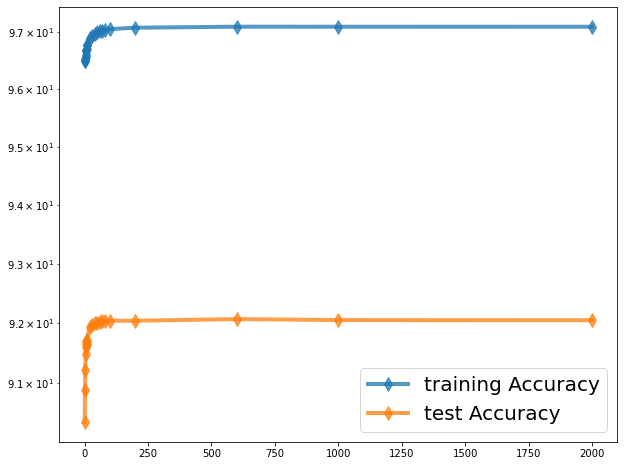

In [5]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))



ax.semilogy(k, acc1, lw=4, marker='d', markersize=10, alpha=0.75,label='training Accuracy')
ax.semilogy(k, acc, lw=4, marker='d', markersize=10, alpha=0.75,label='test Accuracy')
print(acc)



ax.legend(fontsize=20,loc=0)
plt.show()